<a href="https://colab.research.google.com/github/pouyyan/ML_Course_2024/blob/main/Midterm/ML_Midterm_Kamali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load the required libraries

import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.manifold import TSNE
import scipy.stats as stats

import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Dense
import random

from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import imblearn
from collections import Counter
from numpy import where
from imblearn.over_sampling import SMOTE

In [2]:
!pip install --upgrade --no-cach-dir gdown
! gdown 11HdSeza8qBhIZLwF0m5DI8tUbaw3ygdA


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --no-cach-dir
Downloading...
From (original): https://drive.google.com/uc?id=11HdSeza8qBhIZLwF0m5DI8tUbaw3ygdA
From (redirected): https://drive.google.com/uc?id=11HdSeza8qBhIZLwF0m5DI8tUbaw3ygdA&confirm=t&uuid=9c16301a-156b-4c43-b986-c85262670a94
To: /content/DATA.mat
100% 2.91M/2.91M [00:00<00:00, 67.4MB/s]


In [3]:
import scipy.io as sio

Data = sio.loadmat('/content/DATA.mat')
Data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Jun 26 12:48:29 2020',
 '__version__': '1.0',
 '__globals__': [],
 'NOV17': array([[0.0000e+00, 6.4200e+02, 3.5900e+02, ..., 1.4010e+02, 1.7200e+02,
         1.3360e+02],
        [1.0000e+00, 6.3590e+02, 3.5680e+02, ..., 1.4010e+02, 1.7200e+02,
         1.3360e+02],
        [2.0000e+00, 6.3880e+02, 3.5600e+02, ..., 1.4010e+02, 1.7200e+02,
         1.3360e+02],
        ...,
        [8.6397e+04, 6.6420e+02, 3.7260e+02, ..., 1.4040e+02, 1.7310e+02,
         1.3370e+02],
        [8.6398e+04, 6.7030e+02, 3.6290e+02, ..., 1.4040e+02, 1.7300e+02,
         1.3370e+02],
        [8.6399e+04, 6.6590e+02, 3.6310e+02, ..., 1.4040e+02, 1.7310e+02,
         1.3380e+02]]),
 'NOV9': array([[0.0000e+00, 6.9910e+02, 3.0060e+02, ..., 1.3690e+02, 1.6400e+02,
         1.3210e+02],
        [1.0000e+00, 6.9770e+02, 2.9890e+02, ..., 1.3690e+02, 1.6410e+02,
         1.3210e+02],
        [2.0000e+00, 6.9620e+02, 3.0180e+02, ..., 1.3690e+02,

In [4]:
Data_NOV9 = pd.DataFrame(Data['NOV9'])
Data_NOV17 = pd.DataFrame(Data['NOV17'])

Data_NOV9_0 = Data_NOV9.loc[0:57270, :]
df_1 = Data_NOV9.loc[58830:589300,:]
df_2 = Data_NOV9.loc[58520:58625, :]
Data_NOV9_18 = pd.concat([df_1, df_2])
Data_NOV9_16 = Data_NOV9.loc[57275:57550, :]
# Data_NOV9_16.shape, Data_NOV9_18.shape

M = 10
N = 20

data = []
Target = []

# Normal class
for i in range(M*100):
    start_idx = i * N
    end_idx = start_idx + N
    x = np.array(Data_NOV9_0.iloc[start_idx:end_idx, 1])
    data.append(x)  # Append each feature vector to X
    Target.append(0)  # Append the label 0 for normal

for j in range(M*100):
    start_idx = j * N
    end_idx = start_idx + N
    x = np.array(Data_NOV9_18.iloc[start_idx:end_idx, 1])
    data.append(x)
    Target.append(1)  # Append the label 1 for fault 18

for j in range(M):
    start_idx = j * N
    end_idx = start_idx + N
    x = np.array(Data_NOV9_16.iloc[start_idx:end_idx, 1])
    data.append(x)
    Target.append(2)  # Append the label 2 for fault 16


# Convert lists to numpy arrays
data = np.array(data)
Target = np.array(Target).reshape(-1, 1)

In [21]:
Data_NOV17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86400 entries, 0 to 86399
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       86400 non-null  float64
 1   1       86400 non-null  float64
 2   2       86400 non-null  float64
 3   3       86400 non-null  float64
 4   4       86400 non-null  float64
 5   5       86400 non-null  float64
 6   6       86400 non-null  float64
 7   7       86400 non-null  float64
 8   8       86400 non-null  float64
 9   9       86400 non-null  float64
 10  10      86400 non-null  float64
 11  11      86400 non-null  float64
 12  12      86400 non-null  float64
 13  13      86400 non-null  float64
 14  14      86400 non-null  float64
 15  15      86400 non-null  float64
 16  16      86400 non-null  float64
dtypes: float64(17)
memory usage: 11.2 MB


In [20]:
Data_NOV9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86400 entries, 0 to 86399
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       86400 non-null  float64
 1   1       86400 non-null  float64
 2   2       86400 non-null  float64
 3   3       86400 non-null  float64
 4   4       86400 non-null  float64
 5   5       86400 non-null  float64
 6   6       86400 non-null  float64
 7   7       86400 non-null  float64
 8   8       86400 non-null  float64
 9   9       86400 non-null  float64
 10  10      86400 non-null  float64
 11  11      86400 non-null  float64
 12  12      86400 non-null  float64
 13  13      86400 non-null  float64
 14  14      86400 non-null  float64
 15  15      86400 non-null  float64
 16  16      86400 non-null  float64
dtypes: float64(17)
memory usage: 11.2 MB


In [65]:
Target.shape, data.shape

((2010, 1), (2010, 20))

In [5]:
def calculate_row_stats(Input_matrix):
  mean = np.mean(Input_matrix, axis=1)[:, np.newaxis]
  std = np.std(Input_matrix, axis=1)[:, np.newaxis]
  ptp = np.ptp(Input_matrix, axis=1)[:, np.newaxis]
  kurt = stats.kurtosis(Input_matrix, axis=1)[:, np.newaxis]
  skew = stats.skew(Input_matrix, axis=1)[:, np.newaxis]
  rms = np.sqrt(np.mean(Input_matrix**2, axis=1))[:, np.newaxis]
  # Calculate absolute minimum for each row
  abs_mean = np.amin(Input_matrix, axis=1)[:, np.newaxis]
  # Calculate impact factor (assuming difference between max and min)
  peak = np.amax(Input_matrix, axis=1)[:, np.newaxis]
  # Combine into a new matrix
  result_matrix = np.concatenate((mean, std, ptp, kurt, skew, rms, abs_mean, peak), axis=1)
  return result_matrix

stats_matrix = calculate_row_stats(data)

# Print the resulting matrix (containing means and standard deviations)
print(stats_matrix.shape)

(2010, 8)


In [6]:
Class_shuffle, Target_shuffle = shuffle(stats_matrix, Target, random_state = 6)

Data_train, Data1, Target_train, Target1 = train_test_split(Class_shuffle, Target_shuffle, test_size = 0.3, random_state = 6)
Data_valid, Data_test, Target_valid, Target_test = train_test_split(Data1, Target1, test_size = 0.5, random_state = 6)

print(f"Data_train.shape: {Data_train.shape}, Target_train.shape: {Target_train.shape}")
print(f"Data_test.shape: {Data_test.shape}, Target_test.shape: {Target_test.shape}")
print(f"Data_valid.shape: {Data_valid.shape}, Target_valid.shape: {Target_valid.shape}")

Data_train.shape: (1407, 8), Target_train.shape: (1407, 1)
Data_test.shape: (302, 8), Target_test.shape: (302, 1)
Data_valid.shape: (301, 8), Target_valid.shape: (301, 1)


In [67]:
Target_train

array([[ 0],
       [ 0],
       [18],
       ...,
       [18],
       [ 0],
       [ 0]])

          0         1         2         3         4         5         6   \
0   1.000000 -0.682094  0.744116  0.185762  0.762158 -0.703668 -0.706392   
1  -0.682094  1.000000 -0.928661 -0.528543 -0.971644  0.968860  0.969561   
2   0.744116 -0.928661  1.000000  0.577522  0.963789 -0.958894 -0.961455   
3   0.185762 -0.528543  0.577522  1.000000  0.511138 -0.586187 -0.585702   
4   0.762158 -0.971644  0.963789  0.511138  1.000000 -0.982980 -0.985610   
5  -0.703668  0.968860 -0.958894 -0.586187 -0.982980  1.000000  0.991862   
6  -0.706392  0.969561 -0.961455 -0.585702 -0.985610  0.991862  1.000000   
7  -0.008163  0.134783 -0.172597 -0.148542 -0.126678  0.173229  0.153233   
8   0.093401 -0.207246  0.414220  0.379303  0.259718 -0.308631 -0.307542   
9  -0.159712  0.009698  0.133138  0.369100  0.019932 -0.100144 -0.095907   
10  0.525518 -0.598708  0.635128  0.401401  0.656117 -0.663633 -0.661824   
11 -0.653893  0.307044 -0.354873  0.039906 -0.372435  0.303408  0.304908   
12  0.732905

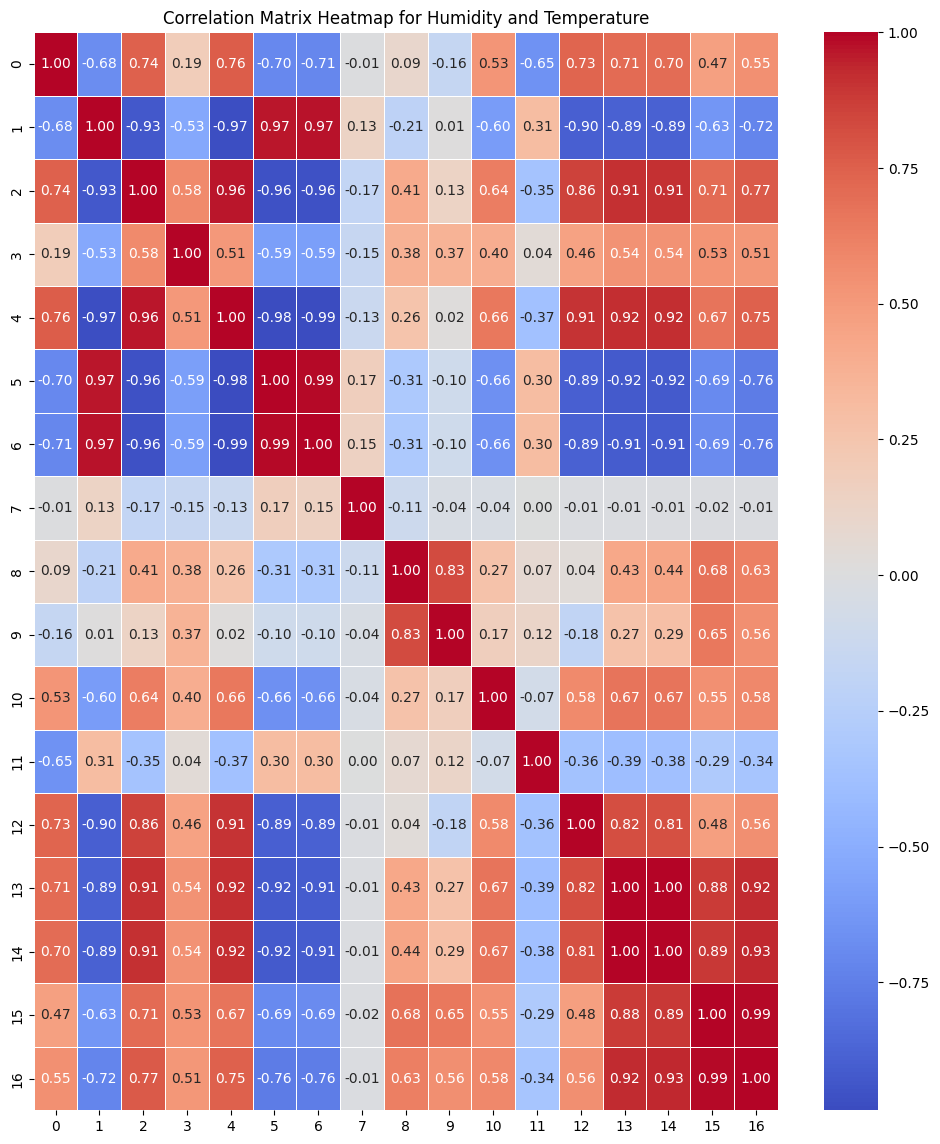

In [7]:
Correlation_Matrix1 = Data_NOV9_0.corr()
print(Correlation_Matrix1)

plt.figure(figsize = (12,14))
sns.heatmap(Correlation_Matrix1, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap for Humidity and Temperature")
plt.show()

<ipython-input-8-edac31c9fe81>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data_train, color = 'teal', label = 'Train Data')
<ipython-input-8-edac31c9fe81>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data_test, color = 'skyblue', label = "Test Data")
<ipython-input-8-edac31c9fe81>:11: 

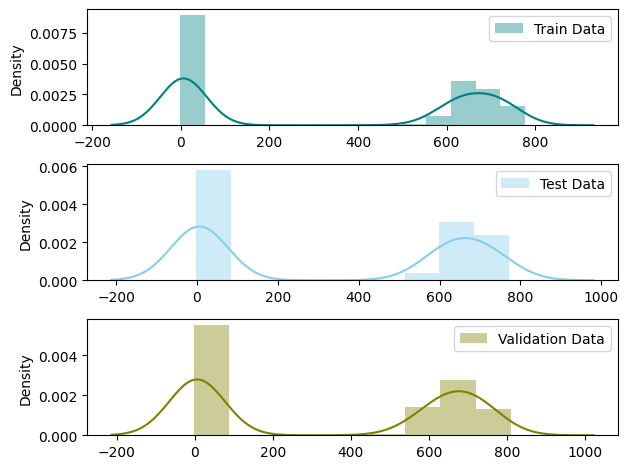

In [8]:
plt.figure()
plt.subplot(3,1,1)
sns.distplot(Data_train, color = 'teal', label = 'Train Data')
plt.legend()

plt.subplot(3,1,2)
sns.distplot(Data_test, color = 'skyblue', label = "Test Data")
plt.legend()

plt.subplot(3,1,3)
sns.distplot(Data_valid, color = 'olive', label = 'Validation Data')
plt.legend()
plt.tight_layout()

In [9]:
from sklearn.preprocessing import MinMaxScaler

MMS = MinMaxScaler()
Data_train_Scaled = MMS.fit_transform(Data_train)
Data_test_Scaled = MMS.fit_transform(Data_test)
Data_valid_Scaled = MMS.fit_transform(Data_valid)

<ipython-input-71-4689fca834a3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data_train_Scaled, color = 'teal', label = 'Train Data')
<ipython-input-71-4689fca834a3>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data_test_Scaled, color = 'skyblue', label = "Test Data")
<ipython-input-71-4

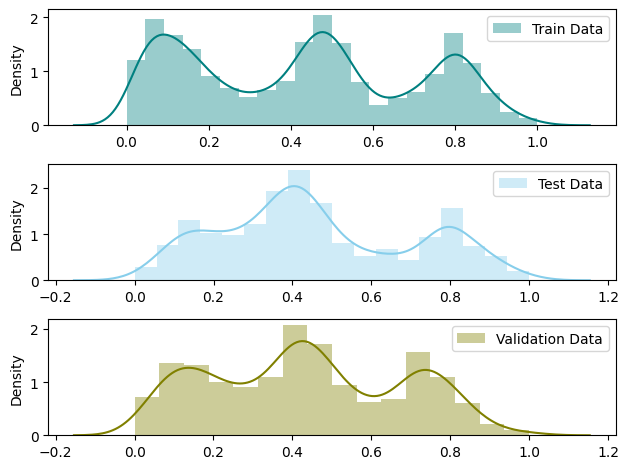

In [71]:
plt.figure()
plt.subplot(3,1,1)
sns.distplot(Data_train_Scaled, color = 'teal', label = 'Train Data')
plt.legend()

plt.subplot(3,1,2)
sns.distplot(Data_test_Scaled, color = 'skyblue', label = "Test Data")
plt.legend()

plt.subplot(3,1,3)
sns.distplot(Data_valid_Scaled, color = 'olive', label = 'Validation Data')
plt.legend()
plt.tight_layout()

In [8]:
Target_train.shape, Data_train_Scaled.shape

((1407, 1), (1407, 8))

In [42]:
tf.random.set_seed(6)
random.seed(6)
model_3_layer = Sequential()

# Add the first hidden layer with 50 neurons and ReLU activation function
model_3_layer.add(Dense(9, activation='tanh', input_shape=(Data_train.shape[1],)))

# Add the second hidden layer with 30 neurons and ReLU activation function
model_3_layer.add(Dense(6, activation='tanh'))

# Add an output layer with 1 neuron and linear activation function
model_3_layer.add(Dense(3, activation='softmax'))

model_3_layer.summary()

model_3_layer.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

history = model_3_layer.fit(Data_train_Scaled, Target_train, validation_data = (Data_valid_Scaled, Target_valid), epochs=100, batch_size = 50)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 9)                 81        
                                                                 
 dense_58 (Dense)            (None, 6)                 60        
                                                                 
 dense_59 (Dense)            (None, 3)                 21        
                                                                 
Total params: 162 (648.00 Byte)
Trainable params: 162 (648.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
29/29 [==============================] - 2s 29ms/step - loss: 1.0107 - accuracy: 0.5267 - val_loss: 0.9151 - val_accuracy: 0.5681
Epoch 2/100
29/29 [==============================] - 0s 10ms/step - loss: 0.8736 - accuracy: 0.5188 - val_loss: 0.7868 - val_accuracy: 0.

Text(0.5, 1.0, 'Loss curve(Optimizer: Adam, Loss: Sparse Categorical Crossentropy)')

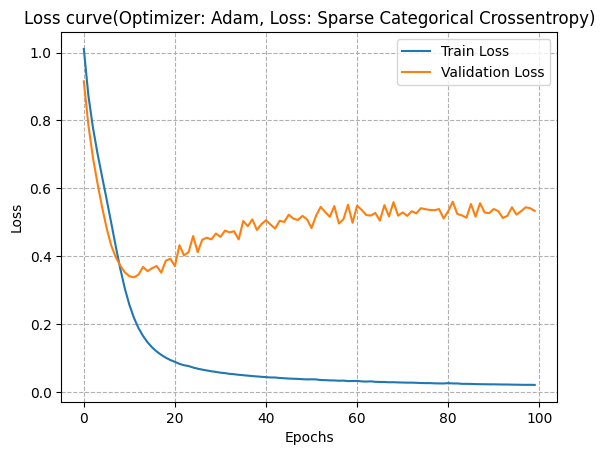

In [43]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, linestyle = '--')
plt.title('Loss curve(Optimizer: Adam, Loss: Sparse Categorical Crossentropy)')

Text(0.5, 1.0, 'Accuracy(Optimizer: Adam, Loss: Sparse Categorical Crossentropy)')

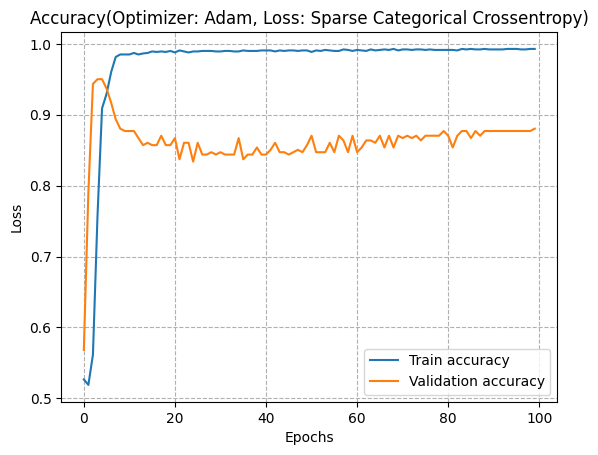

In [44]:
plt.plot(history.history['accuracy'], label = 'Train accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, linestyle = '--')
plt.title('Accuracy(Optimizer: Adam, Loss: Sparse Categorical Crossentropy)')

In [34]:
model_3_layer_N = Sequential()

# Add the first hidden layer with 50 neurons and ReLU activation function
model_3_layer_N.add(Dense(9, activation='tanh', input_shape=(Data_train.shape[1],)))

# Add the third hidden layer with 10 neurons and ReLU activation function
model_3_layer_N.add(Dense(6, activation='tanh'))

# Add an output layer with 1 neuron and linear activation function
model_3_layer_N.add(Dense(3, activation='softmax'))

model_3_layer_N.summary()

model_3_layer_N.compile(loss="KLDivergence", optimizer= 'SGD', metrics=["accuracy"])
history_N = model_3_layer_N.fit(Data_train_Scaled, Target_train, validation_data = (Data_valid_Scaled, Target_valid), epochs=100, batch_size = 50)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 9)                 81        
                                                                 
 dense_46 (Dense)            (None, 6)                 60        
                                                                 
 dense_47 (Dense)            (None, 3)                 21        
                                                                 
Total params: 162 (648.00 Byte)
Trainable params: 162 (648.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
29/29 [==============================] - 1s 12ms/step - loss: 1.6520 - accuracy: 0.2786 - val_loss: 1.5690 - val_accuracy: 0.0831
Epoch 2/100
29/29 [==============================] - 0s 5ms/step - loss: 1.6437 - accuracy: 0.3134 - val_loss: 1.5641 - val_accuracy: 0.0

Text(0.5, 1.0, 'Accuracy(Optimizer: SGD, Loss: Kullback-Leibler(KL) divergence)')

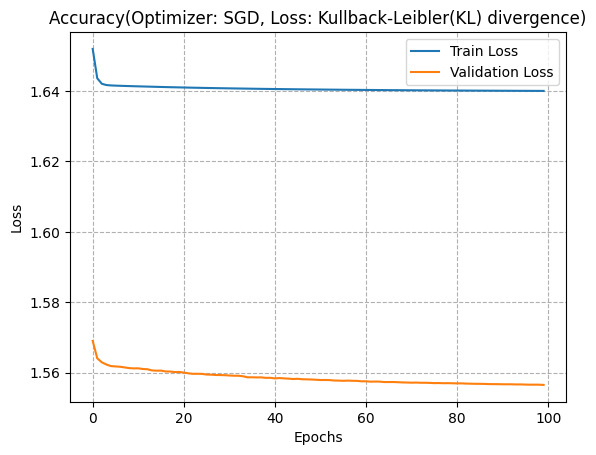

In [35]:
import matplotlib.pyplot as plt

plt.plot(history_N.history['loss'], label = 'Train Loss')
plt.plot(history_N.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, linestyle = '--')
plt.title('Accuracy(Optimizer: SGD, Loss: Kullback-Leibler(KL) divergence)')

Text(0.5, 1.0, 'Accuracy(Optimizer: SGD, Loss: Kullback-Leibler(KL) divergence)')

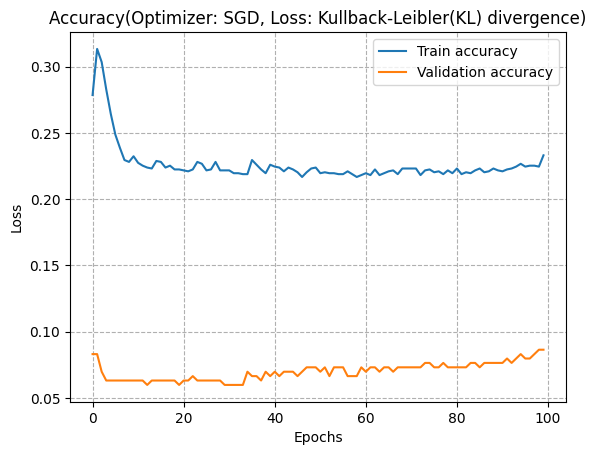

In [36]:
plt.plot(history_N.history['accuracy'], label = 'Train accuracy')
plt.plot(history_N.history['val_accuracy'], label = 'Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, linestyle = '--')
plt.title('Accuracy(Optimizer: SGD, Loss: Kullback-Leibler(KL) divergence)')